# Chapter.3 Single-variate Linear Regression without Bias Term

## Programming Assignment.3-05 Dataset Generator
**(참고!)강의에서 사용하는 Dataset generator와 다릅니다**  
수정의 목적은 이론강의에서 사용되는 index notation을 맞추기 위함입니다.

PA 3-05에서는 Dataset을 만드는 과정을 소개합니다.  
최종 코드는 utils directory에 LR_dataset_generator.py에 들어있으며,  
linear regression 학습에 사용됩니다.

Linear regression에 사용되는 dataset generator를 설명하기 위해 다음과 같은 step들을 거칩니다.
<ul>
    <li> Step.1 Datset for Single-variate Linear Regression </li>
    <li> Step.2 Distribution Parameters </li>
    <li> Step.3 Dataset with Noise </li>
    <li> Step.4 Dataset for Multi-variate Linear Regression </li>
    <li> Step.5 LR_dataset_generator Class : Initialization </li>
    <li> Step.6 make_dataset Method </li>
    <li> Step.7 Set Methods </li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Datset for Single-variate Linear Regression

Single-variate linear regression을 위한 dataset은 다음과 같이
$$y = ax + b$$
에서부터 dataset을 생성합니다.

이를 위해 coefficient는 a, b로 2개가 필요하며 각각 $\theta_{1}, \theta_{0}$의 target theta $\theta_{1}^{*}, \theta_{0}^{*}$가 됩니다.  
index를 맞추기 위해 coefficitn_list는
$$[\theta_{0}^{*}, \theta_{0}^{*}]$$
로 설정해줍니다. 즉,  
coefficient_list[0] = $\theta_{0}^{*}$, coefficient_list[1] = $\theta_{1}^{*}$  
이 됩니다.

그리고 Step.1에서는 x data를 standard normal distribution에서부터 생성합니다.

In [ ]:
n_sample = 100

coefficient_list = [5, 2] # => y = 2x + 5

x_data = np.random.normal(loc = 0, scale = 1, size = (n_sample,1)) # loc = mean, scale = std
y_data = coefficient_list[1] * x_data
y_data += coefficient_list[0]

fig, ax = plt.subplots(figsize = (10,10)) # size가 10*10인 하나의 ax 만을 가지는 하나의 figure 생성
ax.scatter(x_data, y_data)

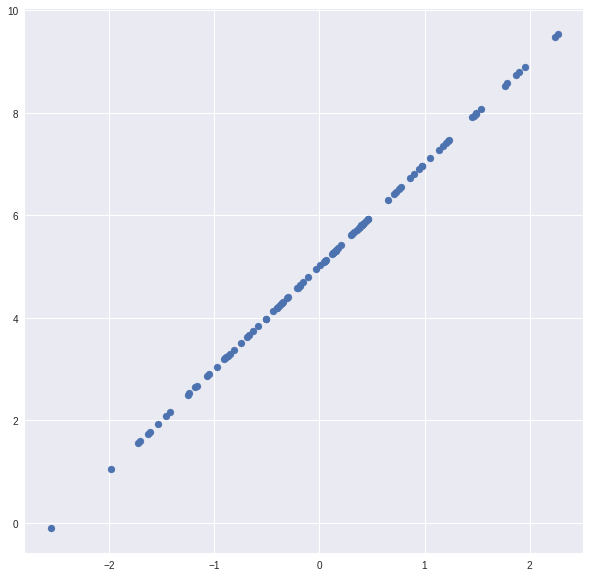

In [2]:
n_sample = 100

coefficient_list = [5, 2] # => y = 2x + 5

x_data = np.random.normal(loc = 0,scale = 1,size = (n_sample,1))
y_data = coefficient_list[1]*x_data
y_data += coefficient_list[0]

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x_data, y_data)

***
## Step.2 Distribution Parameters

x data를 생성할 때, distribution_dict라는 dictionary를 이용하여 mean, standard deviation을 변경해주는 코드입니다.  
추후 이 dictionary는 사용자가 원하는 특성을 가진 dataset을 만들도록 이용됩니다.

In [ ]:
n_sample = 100

distribution_dict = {'mean': 0, 'std': 1}

coefficient_list = [5, 2]

x_data = np.random.normal(loc = distribution_dict['mean'],
                          scale = distribution_dict['std'],
                          size = (n_sample,1))
y_data = coefficient_list[1] * x_data
y_data += coefficient_list[0]

fig, ax = plt.subplot(figsize = (10,10))
ax.scatter(x_data, y_data)

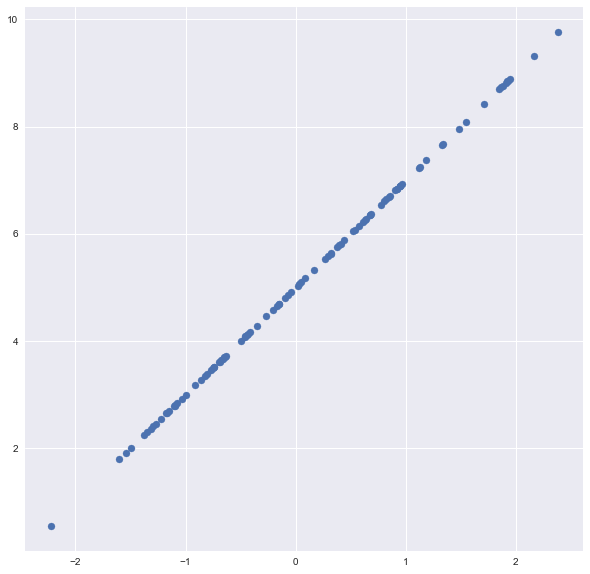

In [ ]:
n_sample = 100

##### Changed Part
distribution_dict = {'mean':0, 'std':1}

coefficient_list = [5, 2]

##### Changed Part
x_data = np.random.normal(loc = distribution_dict['mean'],
                          scale = distribution_dict['std'],
                          size = (n_sample,1))

y_data = coefficient_list[1]*x_data
y_data += coefficient_list[0]

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x_data, y_data)

***
## Step.3 Dataset with Noise

실제 상황과 비슷한 dataset을 생성하기 위해 normal distribution에서부터 생성된 noise를 추가합니다.

np.random.normal에서부터 만들어진 noise에 noise factor를 곱하여 y_data에 추가합니다.

In [7]:
n_sample = 100
noise = 0.5

distribution_dict = {'mean': 1, 'std': 2}
coefficient_list = [5, 2]

x_data = np.random.normal(loc = distribution_dict['mean'],
                          scale = distribution_dict['std'],
                          size = (n_sample,1))

y_data = coefficient_list[1] * x_data
y_data += coefficient_list[0]
y_data += noise * np.random.normal(0, 1, size = (n_sample,1)) # mean=0,std=1,size=(100, 1)인 데이터에 0.5를 곱한 값(random noise 생성)을 y_data에 더함

[-1.92346538]
[1.15306925]
[1.43105059]


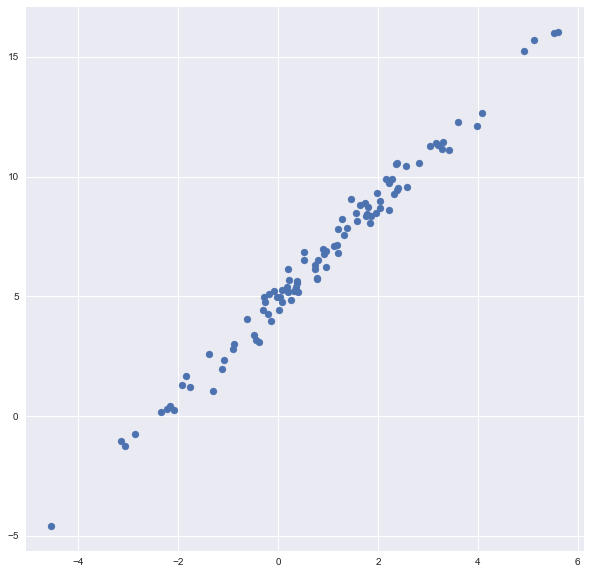

In [ ]:
n_sample = 100
##### Changed Part
noise = 0.5

distribution_dict = {'mean':1, 'std':2}
coefficient_list = [5, 2]

x_data = np.random.normal(loc = distribution_dict['mean'],
                          scale = distribution_dict['std'],
                          size = (n_sample,1))

y_data = coefficient_list[1]*x_data
y_data += coefficient_list[0]
##### Changed Part
y_data += noise*np.random.normal(0, 1, size = (n_sample,1))

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x_data, y_data)

***
## Step.4 Dataset for Multi-variate Linear Regression

Multi-variate linear regression에서는 임의의 m개의 data를 이용하여 prediction $\hat{y}$가 계산합니다.  
이에 따라 dataset도 m개의 data에서부터 y값을 만들어줍니다. 즉,
$$y = w_{m}x_{m} + w_{m-1}w_{m-1} + \dots + w_{1}x_{1} + b$$
에 따라 dataset을 만들어줘야 합니다.

이때 각각의 m개의 data들은 서로 다른 normal distribution에서부터 만들어지며, 각자의 coefficient가 곱해져서 y_data를 만들게 됩니다.

다음의 코드는 3개의 data에서부터 dataset이 만들어지며, 각각의 mean, std이
- $x_{1} : \mu = 0, \sigma = 1$
- $x_{2} : \mu = 1, \sigma = 2$
- $x_{3} : \mu = 2, \sigma = 3$  

의 특성에 따라 만들어지고
$$y = 4x_{3} + 3x_{2} + 2x_{1} + 1$$
의 weighted sum으로부터 만들어지는 코드입니다.

**참고**  
$x_{1}$은 x_data[:,1], $x_{2}$는 x_data[:,2]와 같이 indexing 해주기 위해 첫 번째 column은 빈 column으로 채워준 뒤,
hstack을 통해 x_data를 만들어줍니다.

In [15]:
n_sample = 100
n_feature = 3
noise = 0.5

distribution_params = {1:{'mean':0, 'std':1},
                       2:{'mean':1, 'std':2},
                       3:{'mean':2, 'std':3}}
coefficient_list = [1, 2, 3, 4]

x_data = np.zeros(shape = (n_sample,1))
y_data = np.zeros(shape = (n_sample,1))

for feature_idx in range(1, n_feature+1):
    feature_data = np.random.normal(loc = distribution_params[feature_idx]['mean'],
                                    scale = distribution_params[feature_idx]['std'],
                                    size = (n_sample,1))
    x_data = np.hstack((x_data, feature_data))

    y_data += coefficient_list[feature_idx] * feature_data

y_data += coefficient_list[0] # y 절편

print(x_data[0]) # ==> hstack 결과 확인
print(y_data.shape, x_data.shape)

[ 0.         -0.26800978  1.30435395 -2.8590537 ]
(100, 1) (100, 4)


In [ ]:
n_sample = 100
##### Changed Part
n_feature = 3
noise = 0.5

##### Changed Part
distribution_params = {1:{'mean':0, 'std':1},
                       2:{'mean':1, 'std':2},
                       3:{'mean':2, 'std':3}}
coefficient_list = [1, 2, 3, 4]

x_data = np.zeros(shape = (n_sample,1))
y_data = np.zeros(shape = (n_sample,1))
##### Changed Part
for feature_idx in range(1, n_feature + 1):
    feature_data = np.random.normal(loc = distribution_params[feature_idx]['mean'],
                                    scale = distribution_params[feature_idx]['std'],
                                    size = (n_sample,1))
    x_data = np.hstack((x_data, feature_data))
    
    y_data += coefficient_list[feature_idx]*feature_data
y_data += coefficient_list[0]

print(x_data.shape, y_data.shape)

(100, 4) (100, 1)


***
## Step.5 LR_dataset_generator Class : Initialization

다음 코드는 사용자가 특별한 dataset의 조건을 입력하지 않았을 때의 dataset generation을 위한 initialization code입니다.  
LR_dataset_generator의 parameter는
- feature_dim
- n_sample
- noise  

이며 n_sample, noise는 사용자가 따로 입력하지 않으면 각각 100, 0으로 설정해줘서 noise가 없는 100개의 data sample을 만들어줍니다.

그리고 사용자가 따로 설정해주지 않으면 기본적으로
- weight는 모두 1, bias는 0으로
- $\mu = 0, \sigma = 1$으로  

설정하여 dataset을 만들어줍니다.

In [ ]:
class LR_dataset_generator:
    def __init__(self, feature_dim, n_sample=100, noise=0):
        self.feature_dim = feature_dim
        self.n_sample = n_sample
        self.noise = noise

        self._coefficient_list = None
        self._init_distribution_params()

    def _init_coefficient(self):
        self._coefficient_list = [0] + [1 for _ in range(self._feature_dim)]
    
    def _init_distribution_params(self):
        self._distirbution_params = {f:{'mean': 0,'std': 1}
                                     for f in range(1, self._feature_dim+1)}

In [ ]:
class LR_dataset_generator:
    def __init__(self, feature_dim, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient_list = None
        self._distribution_params = None
        
        self._init_coefficient()
        self._init_distribution_params()
        
    def _init_coefficient(self):
        self._coefficient_list = [0] + [1 for _ in range(self._feature_dim)]
        
    def _init_distribution_params(self):
        self._distribution_params = {f:{'mean':0, 'std':1}
                                     for f in range(1, self._feature_dim+1)}
        
tmp = dataset_generator(3)
print(tmp._coefficient_list)
print(tmp._distribution_params)

[0, 1, 1, 1]
{1: {'mean': 0, 'std': 1}, 2: {'mean': 0, 'std': 1}, 3: {'mean': 0, 'std': 1}}


***
## Step.6 make_dataset Method

Step.4의 내용을 이용하여 사용자가 make_dataset method를 실행시켰을 때,  
LR_dataset_generator instance가 가지고 있는 coefficient_list, distribution_params을 이용하여 dataset을 만들어주는 method를 만듭니다.

In [27]:
class LR_dataset_generator:
    def __init__(self, feature_dim, n_sample=100, noise=0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise

        self._coefficient_list = None
        self._coefficient_list = None

        self._data = None

        self._init_coefficient()
        self._init_distribution_params()

    def _init_coefficient(self):
        self._coefficient_list = [0] + [1 for _ in range(self._feature_dim)]
    
    def _init_distribution_params(self):
        self._distribution_params = {f:{'mean':0, 'std':1}
                                     for f in range(1, self._feature_dim+1)}
    
    def make_dataset(self):
        x_data = np.zeros(shape = (self._n_sample, 1))
        y_data = np.zeros(shape = (self._n_sample, 1))

        for f_idx in range(1, self._feature_dim + 1):
            feature_data = np.random.normal(loc = self._distribution_params[f_idx]['mean'],
                                            scale = self._distribution_params[f_idx]['std'],
                                            size = (self._n_sample, 1))
            x_data = np.hstack((x_data, feature_data))
            
            y_data += self._coefficient_list[f_idx] * feature_data

        y_data += self._coefficient_list[0]

        self._data = np.hstack((x_data, y_data))
        return self._data

tmp = LR_dataset_generator(3)
data = tmp.make_dataset()
print(data.shape)

x_data, y_data = data[:, :-1], data[:, -1].reshape(-1,1) # reshape(-1,1) ==> 그냥 나열된 걸 100,1로 정렬해줌
print(x_data.shape, y_data.shape)

(100, 5)
(100, 4) (100, 1)


In [ ]:
class LR_dataset_generator:
    def __init__(self, feature_dim, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient_list = None
        self._distribution_params = None
        
        self._data = None
        
        self._init_coefficient()
        self._init_distribution_params()
        
    def _init_coefficient(self):
        self._coefficient_list = [0] + [1 for _ in range(self._feature_dim)]
        
    def _init_distribution_params(self):
        self._distribution_params = {f:{'mean':0, 'std':1}
                                     for f in range(1, self._feature_dim+1)}
    
    def make_dataset(self):
        x_data = np.zeros(shape = (self._n_sample, 1))
        y_data = np.zeros(shape = (self._n_sample, 1))
        
        for f_idx in range(1, self._feature_dim + 1):
            feature_data = np.random.normal(loc = self._distribution_params[f_idx]['mean'],
                                            scale = self._distribution_params[f_idx]['std'],
                                            size = (self.n_sample, 1))
            x_data = np.hstack((x_data, feature_data))
            
            y_data += self._coefficient_list[f_idx]*feature_data
        y_data += self._coefficient_list[0]
        
        self._data = np.hstack((x_data, y_data))
        return self._data
            
tmp = dataset_generator(3)
data = tmp.make_dataset()
print(data.shape)

x_data, y_data = data[:,:-1], data[:,-1].reshape(-1,1)
print(x_data.shape, y_data.shape)

(100, 5)
(100, 4) (100, 1)


***
## Step.7 Set Methods

사용자가 make_dataset method을 사용하기 전에, 구체적인 dataset의 특성을 설정해주는 4가지 method를 만들어줍니다. 각각
- set_n_sample
- set_noise
- set_distribution_params
- set_coefficient

입니다.

In [35]:
class LR_dataset_generator:
    def __init__(self, feature_dim, n_sample=100, noise=0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise

        self._coefficient_list = None
        self._distribution_params = None

        self._dataset = None

        self._init_coefficient()
        self._init_distribution_params()

    def _init_coefficient(self):
        self._coefficient_list = [0] + [1 for _ in range(self._feature_dim)] #==> [0, 1, 1, 1] feature_dim 값 만큼 1로 채우기

    def _init_distribution_params(self):
        self._distribution_params = {f:{'mean':0, 'std':1}
                                     for f in range(1, self._feature_dim+1)} #==> 1~feature_dim까지의 숫자를 f에 채우기
    
    def make_dataset(self):
        x_data = np.zeros(shape = (self._n_sample,1))
        y_data = np.zeros(shape = (self._n_sample,1))

        for f_idx in range(1, self._feature_dim + 1):
            feature_data = np.random.normal(loc = self._distribution_params[f_idx]['mean'],
                                            scale = self._distribution_params[f_idx]['std'],
                                            size = (self._n_sample ,1))
            x_data = np.hstack((x_data, feature_data)) # feature_data를 (n_sample, feature_dim+1)의 shape으로 바꾸기 ==> [0, 숫자, 숫자, ...]
                                                                                                                   # [0, 숫자, 숫자, ...]

            y_data += self._coefficient_list[f_idx] * feature_data # 각각의 x1, x2, ...에 weight 곱하기

        y_data += self._coefficient_list[0] # bias 더하기

        self._dataset = np.hstack((x_data, y_data)) # x_data와 y_data를 세로로 붙이기
        return self._dataset
    def set_n_sample(self, n_sample):
        self._n_sample = n_sample

    def set_noise(self, noise):
        self._noise = noise

    def set_distribution_params(self, distribution_params):
        for param_key, param_value in distribution_params.items():
            self._distribution_params[param_key] = param_value

    def set_coefficient(self, coefficient_list):
        self._coefficient_list = coefficient_list

In [ ]:
class LR_dataset_generator:
    def __init__(self, feature_dim, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient_list = None
        self._distribution_params = None
        
        self._dataset = None
        
        self._init_coefficient()
        self._init_distribution_params()
        
    def _init_coefficient(self):
        self._coefficient_list = [0] + [1 for _ in range(self._feature_dim)]
        
    def _init_distribution_params(self):
        self._distribution_params = {f:{'mean':0, 'std':1}
                                     for f in range(1, self._feature_dim+1)}
    
    def make_dataset(self):
        x_data = np.zeros(shape = (self._n_sample, 1))
        y_data = np.zeros(shape = (self._n_sample, 1))
        
        for f_idx in range(1, self._feature_dim + 1):
            feature_data = np.random.normal(loc = self._distribution_params[f_idx]['mean'],
                                            scale = self._distribution_params[f_idx]['std'],
                                            size = (self._n_sample, 1))
            x_data = np.hstack((x_data, feature_data))
            
            y_data += self._coefficient_list[f_idx]*feature_data
        y_data += self._coefficient_list[0]
        
        self._dataset = np.hstack((x_data, y_data))
        return self._dataset
    
    def set_n_sample(self, n_sample):
        self._n_sample = n_sample
    
    def set_noise(self, noise):
        self._noise = noise
    
    def set_distribution_params(self, distribution_params):
        for param_key, param_value in distribution_params.items():
            self._distribution_params[param_key] = param_value
    
    def set_coefficient(self, coefficient_list):
        self._coefficient_list = coefficient_list
    

***
다음은 기본적인 LR_dataset_generator의 사용법에 관한 코드입니다.

customizing을 하지 않고, dataset을 만드는 부분과  
n_sample, distribution_params, noise를 설정해주고 dataset을 만드는 부분으로 나누어집니다.

그리고 각각의 경우 mean, std를 출력하여 만들어진 dataset을 테스트해봅니다.

In [47]:
data_gen = LR_dataset_generator(feature_dim = 3)

dataset = data_gen.make_dataset()
x_data, y_data = dataset[:,:-1], dataset[:,-1].reshape(-1,1)

for feature_idx in range(1, 4):
    print(np.mean(x_data[:,feature_idx]))
    print(np.std(x_data[:,feature_idx]), '\n')

n_sample = 1000
distribution_params = {
    1:{'mean':1, 'std':2},
    2:{'mean':2, 'std':3}
}
noise = 0.5

data_gen.set_distribution_params(distribution_params)
data_gen.set_n_sample(n_sample)
data_gen.set_noise(noise)
dataset = data_gen.make_dataset()

x_data, y_data = dataset[:,:-1], dataset[:,-1].reshape(-1,1)

print("===== After Customizing =====")
for feature_idx in range(1,4):
    print(np.mean(x_data[:,feature_idx]))
    print(np.std(x_data[:,feature_idx]), '\n')

-0.14148261981708019
0.9843420875043918 

0.012190878743390452
0.8729579439710754 

-0.07786096471651277
0.9849643466347815 

===== After Customizing =====
1.1050744535057024
1.9381144468684897 

2.0507883869136863
2.9900020948932196 

0.08902579943287495
0.9686877048507141 



In [45]:
data_gen._distribution_params

{1: {'mean': 1, 'std': 2}, 2: {'mean': 2, 'std': 3}, 3: {'mean': 0, 'std': 1}}

In [ ]:
# Before Customizing
data_gen = LR_dataset_generator(feature_dim = 3)

dataset = data_gen.make_dataset()
x_data, y_data = dataset[:,:-1], dataset[:,-1].reshape(-1,1)

for feature_idx in range(1, 4):
    print(np.mean(x_data[:,feature_idx]))
    print(np.std(x_data[:,feature_idx]), '\n')

# After Customizing
n_sample = 1000
distribution_params = {
    1:{'mean':1, 'std':2},
    2:{'mean':2, 'std':3}}
noise = 0.5

data_gen.set_distribution_params(distribution_params)
data_gen.set_n_sample(n_sample)
data_gen.set_noise(noise)
dataset = data_gen.make_dataset()

x_data, y_data = dataset[:,:-1], dataset[:,-1].reshape(-1,1)
print("====== After Customizing =====")
for feature_idx in range(1, 4):
    print(np.mean(x_data[:,feature_idx]))
    print(np.std(x_data[:,feature_idx]), '\n')
    

0.04866900846802266
0.972479885276105 

0.12301466937229774
0.9199067453768048 

-0.12434563985223335
0.9756324303893582 

====== After Customizing =====
0.9782455862692138
2.019427797515396 

1.8583704657813478
3.085480720612513 

-0.003011520694988441
0.9807388208819495 

